In [41]:
import numpy as np
import pandas as pd
import plotly.express as px

In [42]:
df = pd.read_csv('./data/202302-citibike-tripdata.csv', parse_dates=['started_at','ended_at'])
df.head()

/var/folders/vm/70vjm63s4j19_zfv4zc5lz480000gn/T/ipykernel_10608/915817643.py:1: DtypeWarning:

Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,16991A7C313082EB,classic_bike,2023-02-16 18:20:42,2023-02-16 18:38:06,Kosciuszko St & Nostrand Ave,4519.04,Eastern Pkwy & Troy Ave,3862.07,40.690698,-73.951423,40.669290,-73.936790,casual
1,856FFB566BEEB824,classic_bike,2023-02-09 17:29:36,2023-02-09 17:33:07,Riverside Dr & W 138 St,7942.21,St. Nicholas Terrace & Convent Ave,7937.15,40.823134,-73.955860,40.821294,-73.947868,member
2,B1FE28D50B493430,classic_bike,2023-02-16 15:33:51,2023-02-16 15:35:01,Clinton St & Tillary St,4748.07,Clark St & Henry St,4789.03,40.696233,-73.991421,40.697601,-73.993446,member
3,870EA3D724EA6162,classic_bike,2023-02-23 17:11:39,2023-02-23 17:12:56,Clinton St & Tillary St,4748.07,Clark St & Henry St,4789.03,40.696233,-73.991421,40.697601,-73.993446,member
4,7DE8FA9EAAE8C4ED,electric_bike,2023-02-18 19:29:17,2023-02-18 19:50:52,Audubon Ave & W 192 St,8469.05,St. Nicholas Terrace & Convent Ave,7937.15,40.855890,-73.927082,40.821294,-73.947868,member


In [43]:
df.shape

(1752148, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752148 entries, 0 to 1752147
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 173.8+ MB


In [45]:
station_lst = ['7646.04','7619.05','7631.23','7617.07','7606.01','7577.27','7595.17','7602.05','7643.18','7658.13']

In [46]:
fltr_df = df[(df['start_station_id'].isin(station_lst))].copy()
fltr_df = fltr_df[['start_station_id','start_lat','start_lng']].drop_duplicates('start_station_id')
fltr_df

,start_station_id,start_lat,start_lng
132105,7617.07,40.799624,-73.955892
138545,7631.23,40.801694,-73.957145
138554,7577.27,40.795590,-73.961884
138699,7643.18,40.802535,-73.953242
180376,7658.13,40.803865,-73.955931
181327,7646.04,40.802558,-73.962727
182768,7606.01,40.798186,-73.960591
185239,7619.05,40.799774,-73.962261
188352,7602.05,40.798786,-73.952300
188444,7595.17,40.796935,-73.964341


In [47]:
start_df = df[(df['start_station_id'].isin(station_lst))].copy()
start_df['bikes_out'] = 0

start_df['started_date'] = start_df['started_at'].dt.floor('d')
start_df['ended_date'] = start_df['ended_at'].dt.floor('d')

In [48]:
start_df = start_df.groupby(['start_station_id','start_station_name','started_date'])[['bikes_out']].count().reset_index()
start_df = pd.merge(start_df, fltr_df, how="left", on=["start_station_id"])

In [49]:
start_df.sort_values('bikes_out', ascending=False)[:10]

,start_station_id,start_station_name,started_date,bikes_out,start_lat,start_lng
130,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-20,56,40.799624,-73.955892
129,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-19,44,40.799624,-73.955892
121,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-11,40,40.799624,-73.955892
64,7602.05,Lenox Ave & W 111 St,2023-02-10,38,40.798786,-73.952300
189,7631.23,Frederick Douglass Blvd & W 112 St,2023-02-23,37,40.801694,-73.957145
176,7631.23,Frederick Douglass Blvd & W 112 St,2023-02-10,37,40.801694,-73.957145
186,7631.23,Frederick Douglass Blvd & W 112 St,2023-02-20,34,40.801694,-73.957145
118,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-08,34,40.799624,-73.955892
190,7631.23,Frederick Douglass Blvd & W 112 St,2023-02-24,34,40.801694,-73.957145
137,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-27,34,40.799624,-73.955892


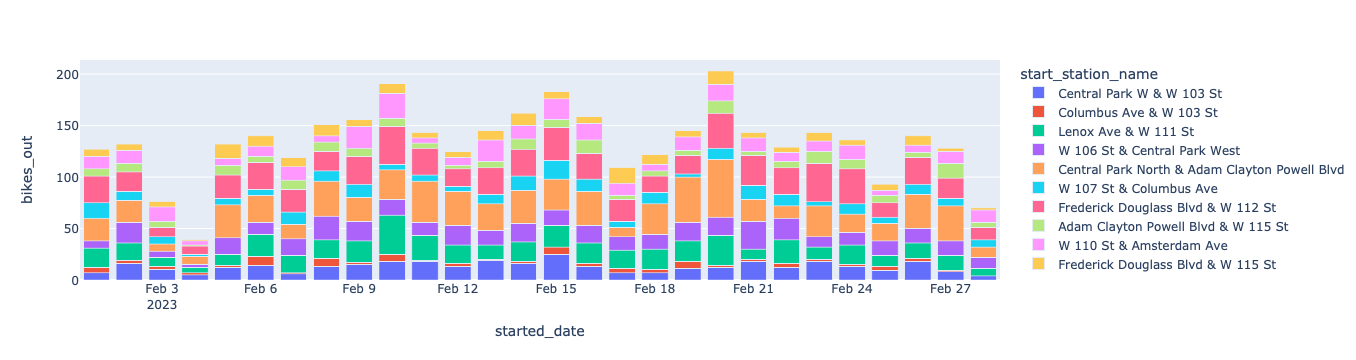

In [50]:
fig = px.bar(start_df, x="started_date", y="bikes_out", color='start_station_name')
fig.show()

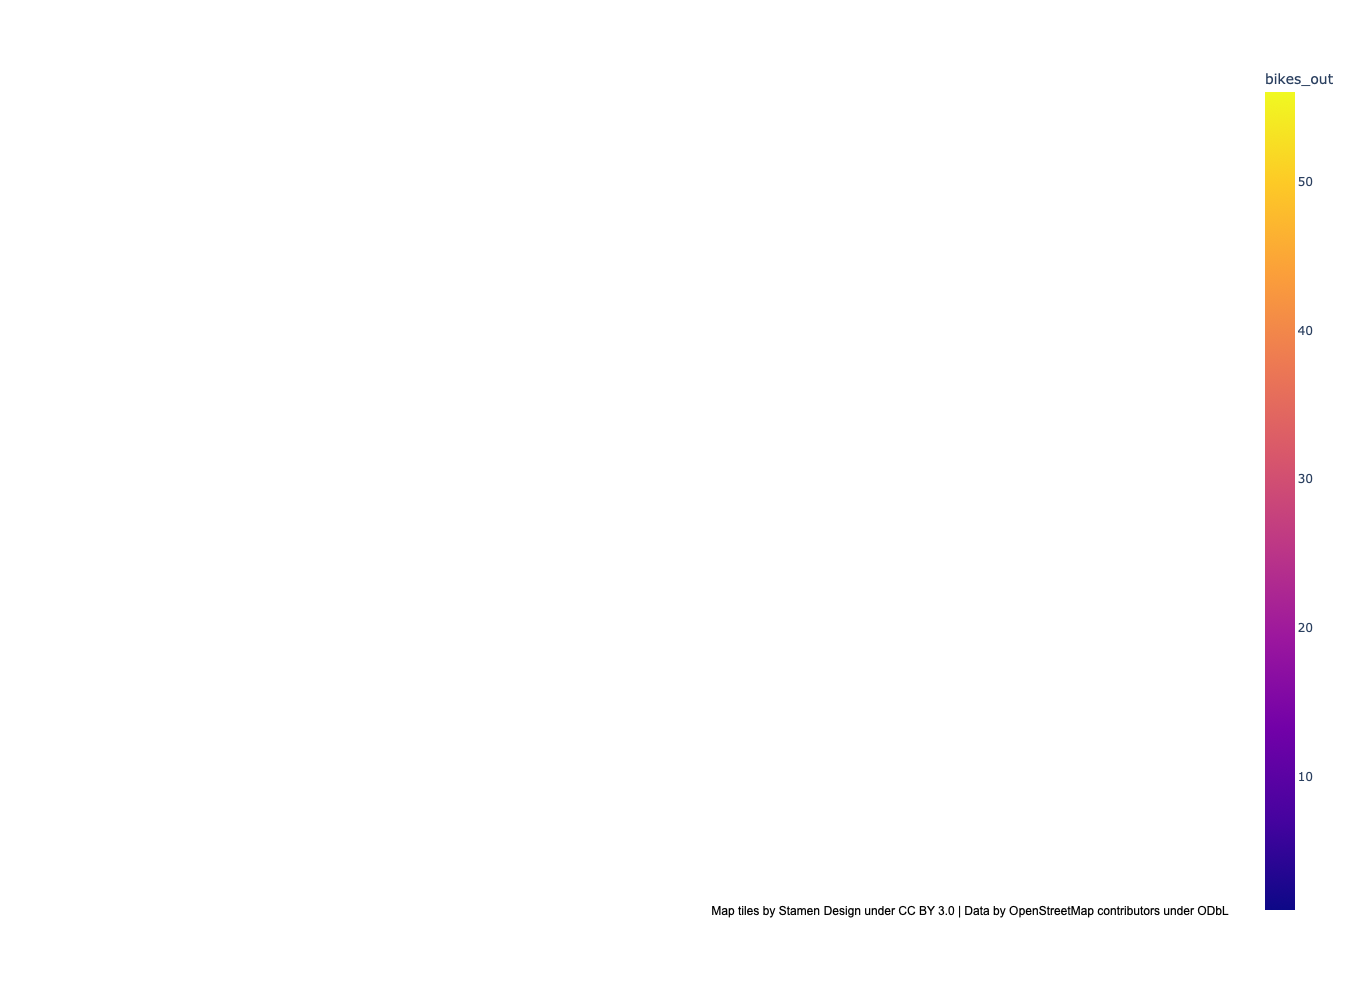

In [51]:
fig = px.density_mapbox(start_df, lat='start_lat', lon='start_lng', z='bikes_out', radius=15,
                        center=dict(lat=40.802, lon=-73.963), zoom=13, height=1000,
                        mapbox_style="stamen-terrain")
fig.show()

In [62]:
end_df = df[(df['end_station_id'].isin(station_lst))].copy()
end_df['bikes_in'] = 0

end_df['started_date'] = end_df['started_at'].dt.floor('d')
end_df['ended_date'] = end_df['ended_at'].dt.floor('d')

In [63]:
end_df = end_df.groupby(['end_station_id','end_station_name','ended_date'])[['bikes_in']].count().reset_index()

In [64]:
end_df.sort_values('bikes_in', ascending=False)[:10]

,end_station_id,end_station_name,ended_date,bikes_in
75,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-20,184
65,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-10,138
70,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-15,121
81,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-26,119
84,7631.23,Frederick Douglass Blvd & W 112 St,2023-02-01,118
66,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-11,118
67,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-12,116
63,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-08,115
74,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-19,110
69,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-14,110


In [67]:
end_df = pd.merge(end_df, fltr_df, how="right", left_on = ["end_station_id"], right_on = ["start_station_id"])

In [68]:
end_df

,end_station_id,end_station_name,ended_date,bikes_in,start_station_id,start_lat,start_lng
0,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-01,75.0,7617.07,40.799624,-73.955892
1,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-02,72.0,7617.07,40.799624,-73.955892
2,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-03,34.0,7617.07,40.799624,-73.955892
3,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-04,17.0,7617.07,40.799624,-73.955892
4,7617.07,Central Park North & Adam Clayton Powell Blvd,2023-02-05,82.0,7617.07,40.799624,-73.955892
...,...,...,...,...,...,...,...
167,7602.05,Lenox Ave & W 111 St,2023-02-25,32.0,7602.05,40.798786,-73.952300
168,7602.05,Lenox Ave & W 111 St,2023-02-26,41.0,7602.05,40.798786,-73.952300
169,7602.05,Lenox Ave & W 111 St,2023-02-27,41.0,7602.05,40.798786,-73.952300
170,7602.05,Lenox Ave & W 111 St,2023-02-28,23.0,7602.05,40.798786,-73.952300


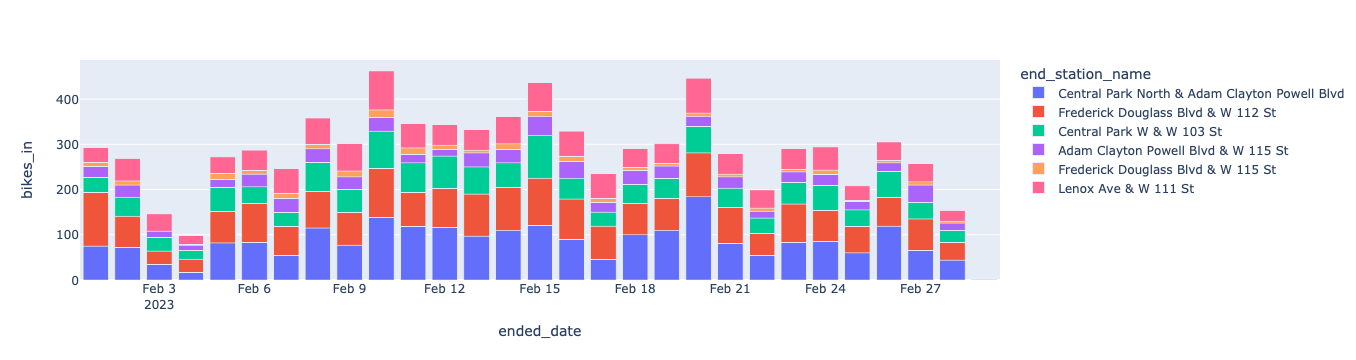

In [70]:
fig = px.bar(end_df, x="ended_date", y="bikes_in", color='end_station_name')
fig.show()

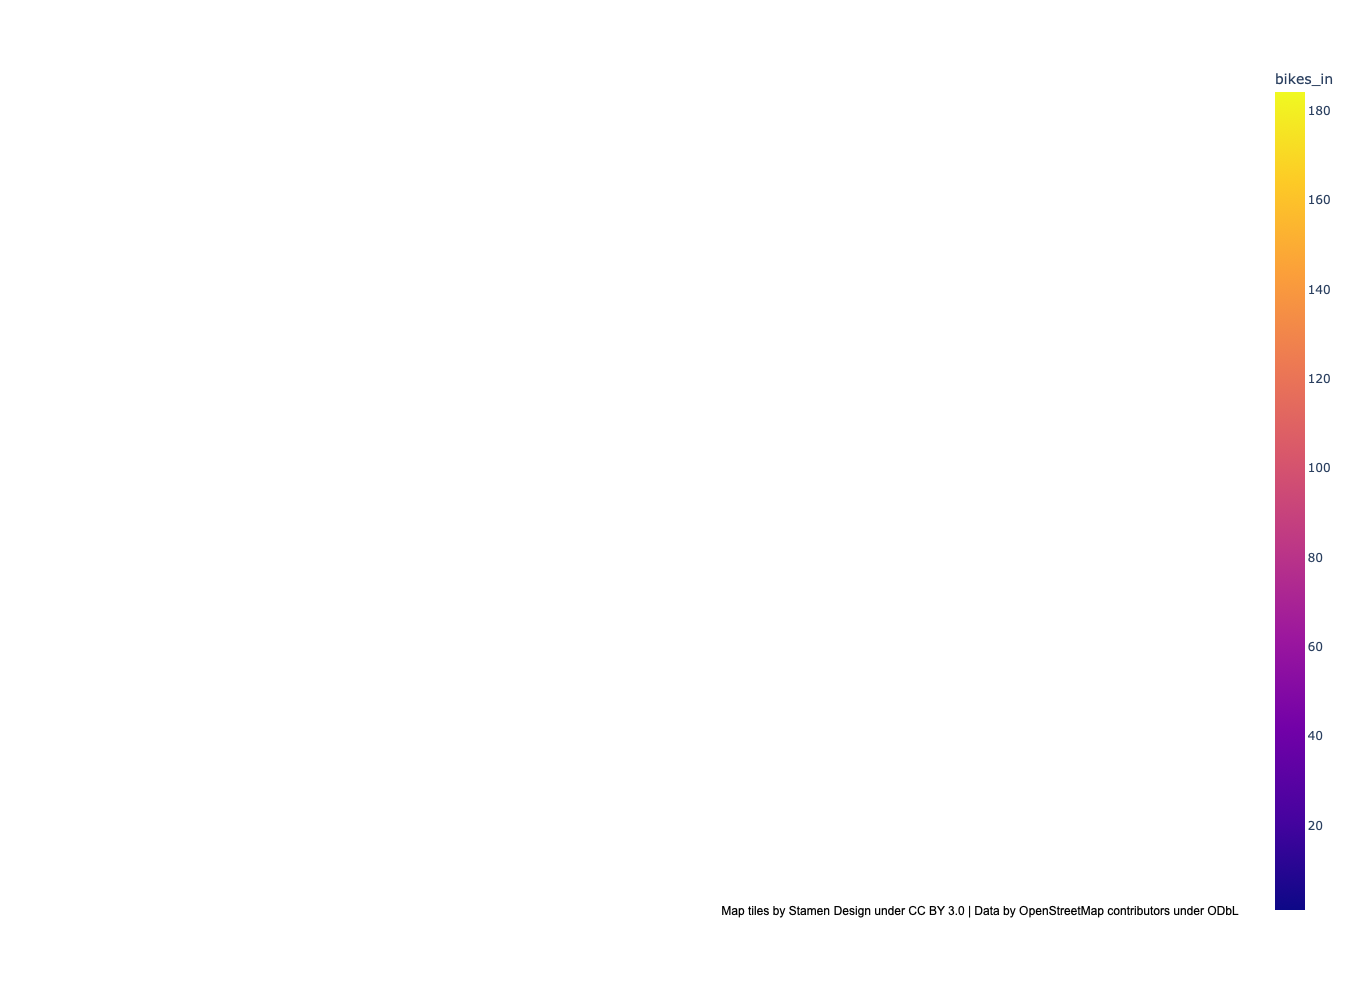

In [71]:
fig = px.density_mapbox(end_df, lat='start_lat', lon='start_lng', z='bikes_in', radius=15,
                        center=dict(lat=40.802, lon=-73.963), zoom=13, height=1000,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
station_lst = ['7646.04','7619.05','7631.23','7617.07','7606.01','7577.27','7595.17','7602.05','7643.18','7658.13']

In [15]:
map_df = df[(df['start_station_id'].isin(station_lst))].copy()
map_df['bikes_out'] = 0
map_df = map_df.groupby(['start_station_id','start_station_name','start_lat','start_lng'])[['bikes_out']].count().reset_index()

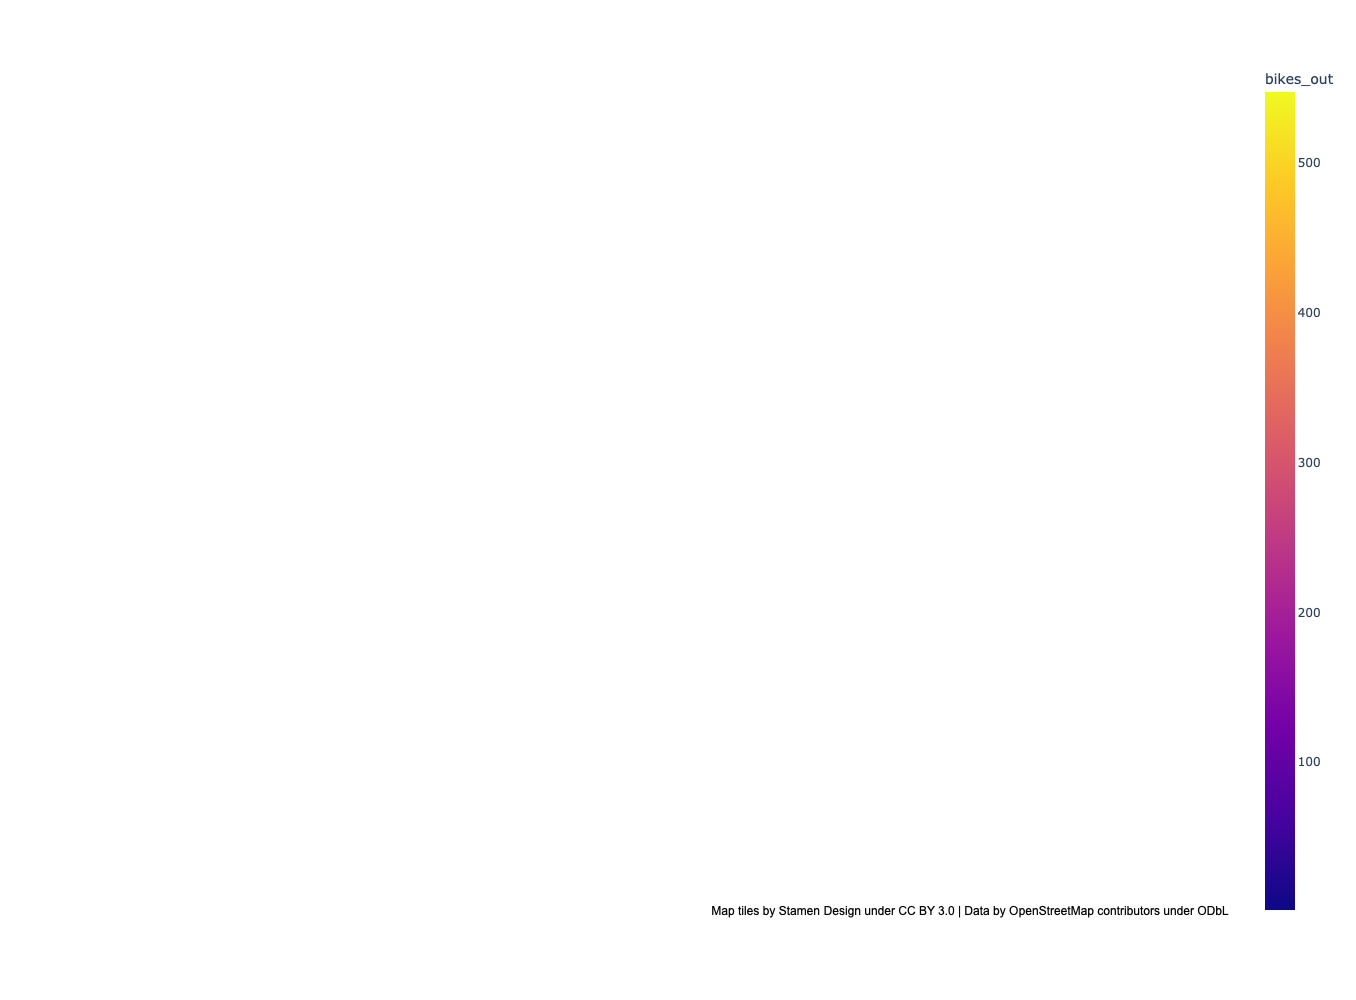

In [21]:
fig = px.density_mapbox(map_df, lat='start_lat', lon='start_lng', z='bikes_out', radius=15,
                        center=dict(lat=40.802, lon=-73.963), zoom=13, height=1000,
                        mapbox_style="stamen-terrain")
fig.show()

 treeSummary_df = pd.merge(treeSummary_df, b_df[['borocode']], how="right", on=["borocode"])
 
 df = pd.DataFrame({'time': ['2022-01-01 01:14:00', '2022-01-01 01:24:15',
                            '2022-01-01 02:52:19', '2022-01-01 02:54:00',
                            '2022-01-01 04:05:10', '2022-01-01 05:35:09'],
                   'sales': [18, 20, 15, 14, 10, 9]})
                   
                   
                   

In [ ]:
station_lst = ['7646.04','7619.05','7631.23','7617.07','7606.01','7577.27','7595.17','7602.05','7643.18','7658.13']

In [38]:
fltr_df = df[(df['start_station_id'].isin(station_lst))].copy()
fltr_df = fltr_df[['start_station_id','start_lat','start_lng']].drop_duplicates('start_station_id')
fltr_df

,start_station_id,start_lat,start_lng
132105,7617.07,40.799624,-73.955892
138545,7631.23,40.801694,-73.957145
138554,7577.27,40.795590,-73.961884
138699,7643.18,40.802535,-73.953242
180376,7658.13,40.803865,-73.955931
181327,7646.04,40.802558,-73.962727
182768,7606.01,40.798186,-73.960591
185239,7619.05,40.799774,-73.962261
188352,7602.05,40.798786,-73.952300
188444,7595.17,40.796935,-73.964341


,start_station_id,start_station_name,started_date,bikes_out
0,7577.27,Central Park W & W 103 St,2023-02-01,7
1,7577.27,Central Park W & W 103 St,2023-02-02,16
2,7577.27,Central Park W & W 103 St,2023-02-03,10
3,7577.27,Central Park W & W 103 St,2023-02-04,5
4,7577.27,Central Park W & W 103 St,2023-02-05,12
...,...,...,...,...
274,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-24,5
275,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-25,6
276,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-26,9
277,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-27,3


In [39]:
#fltr_df = pd.DataFrame({'start_station_id': station_lst})
d1 = pd.merge(start_df, fltr_df, how="left", on=["start_station_id"])
d1

,start_station_id,start_station_name,started_date,bikes_out,start_lat,start_lng
0,7577.27,Central Park W & W 103 St,2023-02-01,7,40.795590,-73.961884
1,7577.27,Central Park W & W 103 St,2023-02-02,16,40.795590,-73.961884
2,7577.27,Central Park W & W 103 St,2023-02-03,10,40.795590,-73.961884
3,7577.27,Central Park W & W 103 St,2023-02-04,5,40.795590,-73.961884
4,7577.27,Central Park W & W 103 St,2023-02-05,12,40.795590,-73.961884
...,...,...,...,...,...,...
274,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-24,5,40.803865,-73.955931
275,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-25,6,40.803865,-73.955931
276,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-26,9,40.803865,-73.955931
277,7658.13,Frederick Douglass Blvd & W 115 St,2023-02-27,3,40.803865,-73.955931


In [ ]:
df = pd.DataFrame({'time': ['2022-01-01 01:14:00', '2022-01-01 01:24:15',
                            '2022-01-01 02:52:19', '2022-01-01 02:54:00',
                            '2022-01-01 04:05:10', '2022-01-01 05:35:09'],
                   'sales': [18, 20, 15, 14, 10, 9]})